# **Machine Learning model for gas production prediction**
### **Author:** M. Sc. Alberto M. Palacio Bastos - Data Scientist
### **Objective:** Build a model to estimate gas production.
### **Dataset:** http://huy302.github.io/interview_dataset.csv


### **Features description:**
- **treatment company**: The treatment company who provides treatment service.
- **azimuth**: Well drilling direction.
- **md (ft)**: Measure depth.
- **tvd (ft)**: True vertical depth.
- **date on production**: First production date.
- **operator**: The well operator who performs drilling service.
- **footage lateral length**: Horizontal well section.
- **well spacing**: Distance to the closest nearby well.
- **porpoise deviation**: How much max (in ft.) a well deviated from its horizontal.
- **porpoise count**: How many times the deviations (porpoises) occurred.
- **shale footage**: How much shale (in ft) encountered in a horizontal well.
- **acoustic impedance**: The impedance of a reservoir rock (ft/s * g/cc).
- **log permeability**: The property of rocks that is an indication of the ability for fluids (gas or liquid) to flow through rocks
- **porosity**: The percentage of void space in a rock. It is defined as the ratio of the volume of the voids or pore space divided by the total volume. It is written as either a decimal fraction between 0 and 1 or as a percentage.
- **poisson ratio**: Measures the ratio of lateral strain to axial strain at linearly elastic region.
- **water saturation**: The ratio of water volume to pore volume.
- **toc**: Total Organic Carbon, indicates the organic richness (hydrocarbon generative potential) of a reservoir rock.
- **vcl**: The amount of clay minerals in a reservoir rock.
- **p-velocity**: The velocity of P-waves (compressional waves) through a reservoir rock (ft/s).
- **s-velocity**: The velocity of S-waves (shear waves) through a reservoir rock (ft/s).
- **youngs modulus**: The ratio of the applied stress to the fractional extension (or shortening) of the reservoir rock parallel to the tension (or compression) (giga pascals).
- **isip**: When the pumps are quickly stopped, and the fluids stop moving, these friction pressures disappear and the resulting pressure is called the instantaneous shut-in pressure, ISIP.
- **breakdown pressure**: The pressure at which a hydraulic fracture is created/initiated/induced.
- **pump rate**: The volume of liquid that travels through the pump in a given time. A hydraulic fracture is formed by pumping fluid into a wellbore at a rate sufficient to increase pressure at the target depth, to exceed that of the fracture gradient (pressure gradient) of the rock.
- **total number of stages**: Total stages used to fracture the horizontal section of the well.
- **proppant volume**: The amount of proppant in pounds used in the completion of a well (lbs).
- **proppant fluid ratio**: The ratio of proppant volume/fluid volume (lbs/gallon).
- **production**: The 12 months cumulative gas production (mmcf).

### **Problem description:** 
The provided dataset is a set of nearby wells located in the United States and their 12 months cumulative production. As a data scientist you want to build a model from scratch to predict production and show that your model can perform well on unseen data.

# **CRISP-DM Methodology**

This project is developed following the steps on the CRISP-DM methodology (Cross Industry Standard Process for Data Mining).

![CRISP-DM Methodology](CRISP-DM.png)

# **1. Business Understanding**

## **1.1.** Understanding the Question 

## **1.2.** Determine Appropriate Approach

# **2. Data Understanding**

### 2.1. Import Libraries and Packages

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualizaton
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# for displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for displaying plots in notebook cell
%matplotlib inline

# Loaging confirmation
print("Libraries Loaded:\n",
      " Numpy:", np.__version__, "\n",
      " Pandas:", pd.__version__, "\n",
      " Matplotlib:", matplotlib.__version__, "\n",
      " Seaborn:", sns.__version__)

Libraries Loaded:
  Numpy: 1.26.2 
  Pandas: 2.2.1 
  Matplotlib: 3.8.3 
  Seaborn: 0.13.0


### 2.2. Load the dataset

In [2]:
# Load dataset
df0 = pd.read_csv("dataset.csv")
df0.head()

,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,acoustic impedance,log permeability,porosity,poisson ratio,water saturation,toc,vcl,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
0,treatment company 1,-32.279999,19148,6443.0,3/1/2018,operator 1,11966.0,4368.46290,6.33,12,1093,30123.20,0.68,0.02,0.34,0.85,5.00,0.42,13592.23,6950.44,30.82,4149.0,NaN,83,56,21568792.0,1.23,5614.947951
1,treatment company 2,-19.799999,15150,7602.0,7/1/2014,operator 2,6890.0,4714.99220,1.28,4,0,30951.61,1.85,0.17,0.19,0.69,4.22,0.74,11735.04,7162.45,29.72,5776.0,NaN,102,33,9841307.0,1.47,2188.836707
2,treatment company 3,-26.879999,14950,5907.0,8/1/2018,operator 1,8793.0,798.92096,2.03,6,3254,28900.25,0.29,0.02,0.33,NaN,4.69,0.61,13227.81,6976.93,30.99,4628.0,NaN,88,62,17116240.0,1.67,1450.033022
3,treatment company 4,-49.099998,11098,6538.0,1/1/2012,operator 1,4234.0,NaN,6.00,23,7470,32826.08,0.73,0.03,0.20,NaN,4.40,0.56,12646.34,6799.37,26.20,4582.0,NaN,100,11,3749559.0,0.77,1060.764407
4,treatment company 5,5.560000,10549,7024.0,1/1/2012,operator 3,2972.0,2967.56300,11.87,9,3637,26740.05,0.47,0.02,0.33,0.80,4.66,0.58,13192.18,7046.91,31.18,4909.0,NaN,94,9,6690705.0,1.32,607.530385


### 2.3. Standardize column names

In [3]:
# Copy orginal dataset
df1 = df0

# get all column names
df1.columns

Index(['treatment company', 'azimuth', 'md (ft)', 'tvd (ft)',
       'date on production', 'operator', 'footage lateral length',
       'well spacing', 'porpoise deviation', 'porpoise count', 'shale footage',
       'acoustic impedance', 'log permeability', 'porosity', 'poisson ratio',
       'water saturation', 'toc', 'vcl', 'p-velocity', 's-velocity',
       'youngs modulus', 'isip', 'breakdown pressure', 'pump rate',
       'total number of stages', 'proppant volume', 'proppant fluid ratio',
       'production'],
      dtype='object')

In [4]:
# rename columns as needed
df1 = df1.rename(columns={'md (ft)':'md',
                          'tvd (ft)':'tvd'})
df1.columns = df1.columns.str.replace(' ', '_')
df1.head()

,treatment_company,azimuth,md,tvd,date_on_production,operator,footage_lateral_length,well_spacing,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,porosity,poisson_ratio,water_saturation,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,breakdown_pressure,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production
0,treatment company 1,-32.279999,19148,6443.0,3/1/2018,operator 1,11966.0,4368.46290,6.33,12,1093,30123.20,0.68,0.02,0.34,0.85,5.00,0.42,13592.23,6950.44,30.82,4149.0,NaN,83,56,21568792.0,1.23,5614.947951
1,treatment company 2,-19.799999,15150,7602.0,7/1/2014,operator 2,6890.0,4714.99220,1.28,4,0,30951.61,1.85,0.17,0.19,0.69,4.22,0.74,11735.04,7162.45,29.72,5776.0,NaN,102,33,9841307.0,1.47,2188.836707
2,treatment company 3,-26.879999,14950,5907.0,8/1/2018,operator 1,8793.0,798.92096,2.03,6,3254,28900.25,0.29,0.02,0.33,NaN,4.69,0.61,13227.81,6976.93,30.99,4628.0,NaN,88,62,17116240.0,1.67,1450.033022
3,treatment company 4,-49.099998,11098,6538.0,1/1/2012,operator 1,4234.0,NaN,6.00,23,7470,32826.08,0.73,0.03,0.20,NaN,4.40,0.56,12646.34,6799.37,26.20,4582.0,NaN,100,11,3749559.0,0.77,1060.764407
4,treatment company 5,5.560000,10549,7024.0,1/1/2012,operator 3,2972.0,2967.56300,11.87,9,3637,26740.05,0.47,0.02,0.33,0.80,4.66,0.58,13192.18,7046.91,31.18,4909.0,NaN,94,9,6690705.0,1.32,607.530385


### 2.4. Gather basic information about the dataset

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment_company       1000 non-null   object 
 1   azimuth                 945 non-null    float64
 2   md                      1000 non-null   int64  
 3   tvd                     980 non-null    float64
 4   date_on_production      1000 non-null   object 
 5   operator                1000 non-null   object 
 6   footage_lateral_length  1000 non-null   float64
 7   well_spacing            844 non-null    float64
 8   porpoise_deviation      1000 non-null   float64
 9   porpoise_count          1000 non-null   int64  
 10  shale_footage           1000 non-null   int64  
 11  acoustic_impedance      1000 non-null   float64
 12  log_permeability        1000 non-null   float64
 13  porosity                881 non-null    float64
 14  poisson_ratio           1000 non-null   f

### 2.5. Gather basic descriptive statistics about the data

In [6]:
df1.describe(include='all')

,treatment_company,azimuth,md,tvd,date_on_production,operator,footage_lateral_length,well_spacing,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,porosity,poisson_ratio,water_saturation,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,breakdown_pressure,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production
count,1000,945.000000,1000.000000,980.000000,1000,1000,1000.000000,844.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,881.000000,1000.000000,423.000000,979.000000,1000.000000,1000.000000,1000.000000,981.000000,923.000000,256.000000,1000.000000,1000.000000,8.680000e+02,1000.00000,1000.000000
unique,31,NaN,NaN,NaN,87,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,treatment company 1,NaN,NaN,NaN,7/1/2014,operator 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,130,NaN,NaN,NaN,80,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-33.905735,13988.387000,7103.620408,NaN,NaN,6387.049510,2223.227174,50.457090,9.443000,3784.827000,33492.835400,0.623570,0.032338,0.304310,0.788913,4.618652,0.629230,12766.714230,6933.582230,30.275525,4965.485374,7365.949219,85.052000,28.815000,1.060880e+07,1.16613,1949.919511
std,NaN,17.975658,2584.315924,896.947293,NaN,NaN,2520.330314,1255.063341,118.436695,6.882596,3703.775191,2074.387344,0.392759,0.025756,0.044977,0.142612,0.583358,0.313222,713.112641,179.966553,1.488059,778.399766,1484.094160,12.510308,15.518234,6.404058e+06,0.37555,1351.485865
min,NaN,-87.250000,8642.000000,4859.000000,NaN,NaN,1329.000000,335.458620,0.030000,0.000000,0.000000,26740.050000,-0.030000,0.000000,0.190000,0.220000,1.630000,0.030000,10631.340000,6374.620000,25.640000,2149.000000,4364.000000,2.000000,9.000000,1.760960e+05,0.03000,76.107246
25%,NaN,-46.220001,12157.500000,6407.000000,NaN,NaN,4668.000000,1084.525475,4.660000,4.000000,0.000000,32718.460000,0.310000,0.020000,0.280000,0.735000,4.515000,0.470000,12230.625000,6808.660000,29.720000,4391.500000,6102.750000,77.000000,16.000000,6.146848e+06,0.95000,1003.897453
50%,NaN,-32.990002,13659.500000,6977.000000,NaN,NaN,5927.000000,1999.295250,10.880000,8.000000,3591.500000,34592.225000,0.520000,0.020000,0.330000,0.830000,4.680000,0.580000,13158.920000,6958.975000,30.840000,4927.000000,7018.000000,86.000000,26.000000,9.082286e+06,1.12000,1568.681918
75%,NaN,-22.580000,15468.000000,7820.000000,NaN,NaN,7744.000000,3090.201450,30.537500,13.000000,6081.750000,34819.790000,0.870000,0.040000,0.340000,0.870000,4.825000,0.630000,13272.570000,7037.292500,31.130000,5550.500000,8868.250000,95.000000,39.000000,1.366105e+07,1.33000,2621.207163


**Note:** From the basic information and descriptive statistics gathered, I have identified 2 categorical variables in the dataset: `treatment_company` and `operator`. Also, 1 date variable is identified: `date_on_production`.

In [7]:
print(df1['treatment_company'].unique())
df1['treatment_company'].value_counts()

['treatment company 1' 'treatment company 2' 'treatment company 3'
 'treatment company 4' 'treatment company 5' 'treatment company 6'
 'treatment company 7' 'treatment company 8' 'treatment company 9'
 'treatment company 10' 'treatment company 11' 'treatment company 12'
 'treatment company 13' 'treatment company 14' 'treatment company 15'
 'treatment company 16' 'treatment company 17' 'treatment company 18'
 'treatment company 19' 'treatment company 20' 'treatment company 21'
 'treatment company 22' 'treatment company 23' 'treatment company 24'
 'treatment company 25' 'treatment company 26' 'treatment company 27'
 'treatment company 28' 'treatment company 29' 'treatment company 30'
 'treatment company 31']


treatment_company
treatment company 1     130
treatment company 10    120
treatment company 12    116
treatment company 4     113
treatment company 5      85
treatment company 8      77
treatment company 9      76
treatment company 2      71
treatment company 3      70
treatment company 11     30
treatment company 7      29
treatment company 16     23
treatment company 13      9
treatment company 6       9
treatment company 15      7
treatment company 23      5
treatment company 17      4
treatment company 19      3
treatment company 29      3
treatment company 14      3
treatment company 24      3
treatment company 25      2
treatment company 30      2
treatment company 26      2
treatment company 31      2
treatment company 21      1
treatment company 27      1
treatment company 28      1
treatment company 20      1
treatment company 18      1
treatment company 22      1
Name: count, dtype: int64

In [8]:
# Replace string in 'treatment_company' 
comp_str = df1['treatment_company'].unique()
comp_code = list(range(1,32,1))
df1['treatment_company'] = df1['treatment_company'].replace(comp_str, comp_code)
df1['treatment_company'].unique()

C:\Users\alber\AppData\Local\Temp\ipykernel_30232\2823155180.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['treatment_company'] = df1['treatment_company'].replace(comp_str, comp_code)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [9]:
print(df1['operator'].unique())
df1['operator'].value_counts()

['operator 1' 'operator 2' 'operator 3' 'operator 4' 'operator 5'
 'operator 6' 'operator 7' 'operator 8' 'operator 9' 'operator 10'
 'operator 11' 'operator 12' 'operator 13' 'operator 14' 'operator 15'
 'operator 16' 'operator 17' 'operator 18' 'operator 19' 'operator 20'
 'operator 21' 'operator 22' 'operator 23' 'operator 24' 'operator 25'
 'operator 26' 'operator 27' 'operator 28' 'operator 29' 'operator 30'
 'operator 31' 'operator 32' 'operator 33' 'operator 34' 'operator 35'
 'operator 36']


operator
operator 4     133
operator 11    130
operator 1     106
operator 5      83
operator 6      73
operator 14     63
operator 8      53
operator 7      46
operator 25     46
operator 20     45
operator 2      40
operator 26     28
operator 9      23
operator 22     18
operator 17     16
operator 19     15
operator 13     13
operator 18     12
operator 15     10
operator 27      7
operator 12      6
operator 16      6
operator 24      4
operator 29      4
operator 23      3
operator 3       3
operator 28      2
operator 30      2
operator 33      2
operator 35      2
operator 10      1
operator 21      1
operator 31      1
operator 32      1
operator 34      1
operator 36      1
Name: count, dtype: int64

In [10]:
# Replace string in 'operator' 
oper_str = df1['operator'].unique()
oper_code = list(range(1,37,1))
df1['operator'] = df1['operator'].replace(oper_str, oper_code)
df1['operator'].unique()

C:\Users\alber\AppData\Local\Temp\ipykernel_30232\4136657799.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['operator'] = df1['operator'].replace(oper_str, oper_code)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

Regarding the `date_on_production` feature, a `age` can be extracted as a new feature by substracting the `date_on_production` from todays date.

In [11]:
from datetime import date
df1['date_on_production'] = pd.to_datetime(df1['date_on_production'])
df1['year_on_production'] = df1['date_on_production'].dt.year
df1['age'] = date.today().year - df1['year_on_production']
print(df1.info())
df1.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   treatment_company       1000 non-null   int64         
 1   azimuth                 945 non-null    float64       
 2   md                      1000 non-null   int64         
 3   tvd                     980 non-null    float64       
 4   date_on_production      1000 non-null   datetime64[ns]
 5   operator                1000 non-null   int64         
 6   footage_lateral_length  1000 non-null   float64       
 7   well_spacing            844 non-null    float64       
 8   porpoise_deviation      1000 non-null   float64       
 9   porpoise_count          1000 non-null   int64         
 10  shale_footage           1000 non-null   int64         
 11  acoustic_impedance      1000 non-null   float64       
 12  log_permeability        1000 non-null   float64  

,treatment_company,azimuth,md,tvd,date_on_production,operator,footage_lateral_length,well_spacing,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,porosity,poisson_ratio,water_saturation,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,breakdown_pressure,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production,year_on_production,age
count,1000.00000,945.000000,1000.000000,980.000000,1000,1000.000000,1000.000000,844.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,881.000000,1000.000000,423.000000,979.000000,1000.000000,1000.000000,1000.000000,981.000000,923.000000,256.000000,1000.000000,1000.000000,8.680000e+02,1000.00000,1000.000000,1000.000000,1000.000000
mean,7.22900,-33.905735,13988.387000,7103.620408,2015-05-18 23:39:50.400000256,10.165000,6387.049510,2223.227174,50.457090,9.443000,3784.827000,33492.835400,0.623570,0.032338,0.304310,0.788913,4.618652,0.629230,12766.714230,6933.582230,30.275525,4965.485374,7365.949219,85.052000,28.815000,1.060880e+07,1.16613,1949.919511,2014.987000,9.013000
min,1.00000,-87.250000,8642.000000,4859.000000,2011-01-01 00:00:00,1.000000,1329.000000,335.458620,0.030000,0.000000,0.000000,26740.050000,-0.030000,0.000000,0.190000,0.220000,1.630000,0.030000,10631.340000,6374.620000,25.640000,2149.000000,4364.000000,2.000000,9.000000,1.760960e+05,0.03000,76.107246,2011.000000,5.000000
25%,3.00000,-46.220001,12157.500000,6407.000000,2013-07-01 00:00:00,4.000000,4668.000000,1084.525475,4.660000,4.000000,0.000000,32718.460000,0.310000,0.020000,0.280000,0.735000,4.515000,0.470000,12230.625000,6808.660000,29.720000,4391.500000,6102.750000,77.000000,16.000000,6.146848e+06,0.95000,1003.897453,2013.000000,7.000000
50%,7.00000,-32.990002,13659.500000,6977.000000,2015-04-01 00:00:00,8.000000,5927.000000,1999.295250,10.880000,8.000000,3591.500000,34592.225000,0.520000,0.020000,0.330000,0.830000,4.680000,0.580000,13158.920000,6958.975000,30.840000,4927.000000,7018.000000,86.000000,26.000000,9.082286e+06,1.12000,1568.681918,2015.000000,9.000000
75%,10.00000,-22.580000,15468.000000,7820.000000,2017-08-01 00:00:00,14.000000,7744.000000,3090.201450,30.537500,13.000000,6081.750000,34819.790000,0.870000,0.040000,0.340000,0.870000,4.825000,0.630000,13272.570000,7037.292500,31.130000,5550.500000,8868.250000,95.000000,39.000000,1.366105e+07,1.33000,2621.207163,2017.000000,11.000000
max,31.00000,22.940001,27797.000000,9639.000000,2019-04-01 00:00:00,36.000000,19849.000000,5225.089400,1106.130000,39.000000,17763.000000,38057.630000,1.940000,0.210000,0.350000,1.040000,6.860000,2.050000,14501.580000,7491.530000,33.100000,9295.000000,11116.000000,110.000000,110.000000,4.195037e+07,5.41000,8880.671151,2019.000000,13.000000
std,5.10888,17.975658,2584.315924,896.947293,NaN,7.742074,2520.330314,1255.063341,118.436695,6.882596,3703.775191,2074.387344,0.392759,0.025756,0.044977,0.142612,0.583358,0.313222,713.112641,179.966553,1.488059,778.399766,1484.094160,12.510308,15.518234,6.404058e+06,0.37555,1351.485865,2.227508,2.227508


### 2.6 Check for duplicates

In [12]:
duplicates = df1.duplicated().sum()
if duplicates>0 :
    print('There are', duplicates, 'duplicated rows in the data.')
    total_rows = df1['treatment_company'].count()
    print('Percentage of dupicated data:', round(duplicates/total_rows*100, 2) ,'%')
else:
    print('There are no duplicates in the data.')

There are no duplicates in the data.


### 2.7. Check for missing data

In [13]:
# Check for missing values
df1.isna().sum()

treatment_company           0
azimuth                    55
md                          0
tvd                        20
date_on_production          0
operator                    0
footage_lateral_length      0
well_spacing              156
porpoise_deviation          0
porpoise_count              0
shale_footage               0
acoustic_impedance          0
log_permeability            0
porosity                  119
poisson_ratio               0
water_saturation          577
toc                        21
vcl                         0
p-velocity                  0
s-velocity                  0
youngs_modulus             19
isip                       77
breakdown_pressure        744
pump_rate                   0
total_number_of_stages      0
proppant_volume           132
proppant_fluid_ratio        0
production                  0
year_on_production          0
age                         0
dtype: int64

To help decide what to do with the missing data, paiplots of each feature v. the target variable `production` are displayed

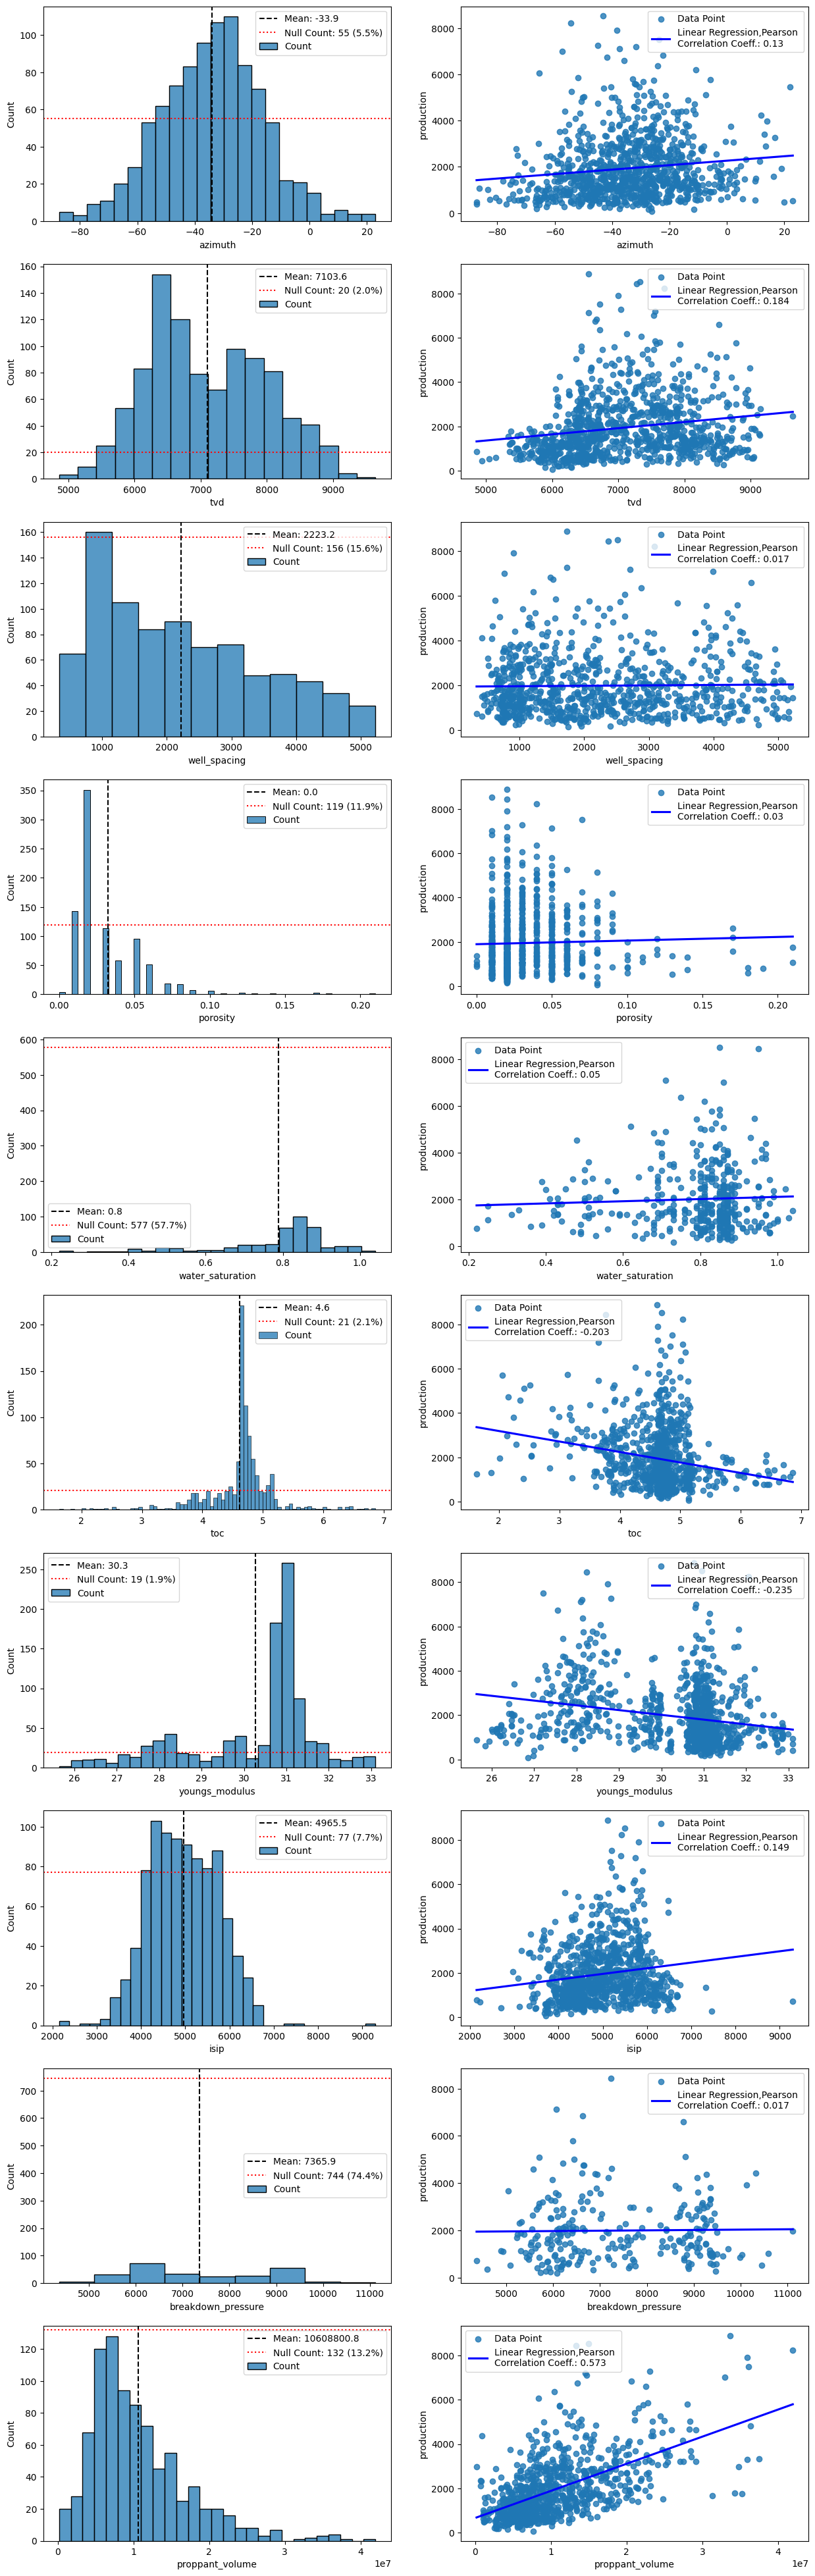

In [14]:
null_data_features = ['azimuth', 'tvd', 'well_spacing', 'porosity', 
                      'water_saturation', 'toc', 'youngs_modulus', 
                      'isip', 'breakdown_pressure', 'proppant_volume']

fig, ax = plt.subplots(len(null_data_features), 2, figsize = (15,5*len(null_data_features)))
i = 0
for feature in null_data_features:
    sns.histplot(data=df1, x=feature, ax=ax[i,0])
    ax[i,0].axvline(x=df1[feature].mean(), color='k', label='mean', ls='--')
    ax[i,0].axhline(y=df1[feature].isna().sum(), color='r', label='mean', ls=':')
    ax[i,0].legend(labels=['Mean: ' + str(round(df1[feature].mean(), ndigits=1)), 
                           'Null Count: ' + str(df1[feature].isna().sum()) + ' (' + str(round(df1[feature].isna().sum() / len(df1[feature]) *100, ndigits=1))+ '%)', 
                           'Count'
                           ])
    
    sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[i,1])
    ax[i,1].legend(labels=['Data Point', 
                           'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                           ])
    i=i+1

Additionally, a heatmap displaying the correlation of each feature with the target variable is shown.

<Axes: >

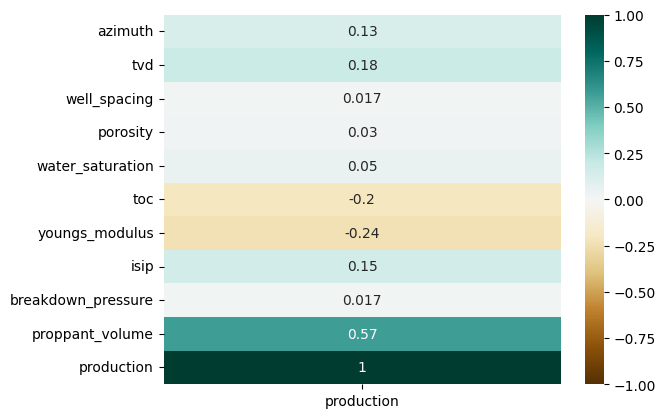

In [15]:
null_data_df = pd.concat([df1[null_data_features], df1['production']], axis=1)

sns.heatmap(null_data_df.corr()[['production']], vmin=-1, vmax=1, annot=True, cmap='BrBG')

Considering the findings of this preliminary analysis, the missing values treatment strategy per feature is enlisted below:

| **Feature** | **Null value percentage** | **Pearson Correlation Coefficient with target: `production`** | **Missing Values Strategy** | **Risk of information loss**|
|----|----|----|----|----|
| `azimuth` | 5.5% | 0.13 | Replace missing values with mean | Low |
| `tvd` | 2.0% | 0.18 | Delete row / delete record | Low |
| `well_spacing` | 15.6% | 0.017 | Delete column / delete feature | Low |
| `porosity` | 11.9% | 0.03 | Delete column / delete feature | Low |
| `water_saturation` | 57.7% (high) | 0.05 (low) | Delete column / delete feature | Medium
| `toc` | 2.1% | -0.20 | Replace missing values with mean | Low |
| `youngs_modulus` | 1.9% | -0.24 | Delete row / delete record | Medium |
| `isip` | 7.7% | 0.15 | Replace missing values with mean | Low |
| `breakdown_pressure` | 74.4%  (high) | 0.017 (low) | Delete column / delete feature | Low |
| `proppant_volume` | 13.2% | 0.57 | Delete row / delete record | Medium |

Apply missing values strategy:

In [16]:
# Drop features with low correlation coefficient
df2 = df1.drop(columns = ['well_spacing', 'porosity', 'water_saturation', 'breakdown_pressure'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   treatment_company       1000 non-null   int64         
 1   azimuth                 945 non-null    float64       
 2   md                      1000 non-null   int64         
 3   tvd                     980 non-null    float64       
 4   date_on_production      1000 non-null   datetime64[ns]
 5   operator                1000 non-null   int64         
 6   footage_lateral_length  1000 non-null   float64       
 7   porpoise_deviation      1000 non-null   float64       
 8   porpoise_count          1000 non-null   int64         
 9   shale_footage           1000 non-null   int64         
 10  acoustic_impedance      1000 non-null   float64       
 11  log_permeability        1000 non-null   float64       
 12  poisson_ratio           1000 non-null   float64  

In [17]:
# Replace missing values with mean in 'azimuth', 'toc' and 'isip'
df2['azimuth'] = df2['azimuth'].fillna(df2['azimuth'].mean())
df2['toc'] = df2['toc'].fillna(df2['toc'].mean())
df2['isip'] = df2['isip'].fillna(df2['isip'].mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   treatment_company       1000 non-null   int64         
 1   azimuth                 1000 non-null   float64       
 2   md                      1000 non-null   int64         
 3   tvd                     980 non-null    float64       
 4   date_on_production      1000 non-null   datetime64[ns]
 5   operator                1000 non-null   int64         
 6   footage_lateral_length  1000 non-null   float64       
 7   porpoise_deviation      1000 non-null   float64       
 8   porpoise_count          1000 non-null   int64         
 9   shale_footage           1000 non-null   int64         
 10  acoustic_impedance      1000 non-null   float64       
 11  log_permeability        1000 non-null   float64       
 12  poisson_ratio           1000 non-null   float64  

In [18]:
# Drop row / records with missing values in 'tvd', 'youngs_modulus' and 'propant_volume'
df3 = df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   treatment_company       837 non-null    int64         
 1   azimuth                 837 non-null    float64       
 2   md                      837 non-null    int64         
 3   tvd                     837 non-null    float64       
 4   date_on_production      837 non-null    datetime64[ns]
 5   operator                837 non-null    int64         
 6   footage_lateral_length  837 non-null    float64       
 7   porpoise_deviation      837 non-null    float64       
 8   porpoise_count          837 non-null    int64         
 9   shale_footage           837 non-null    int64         
 10  acoustic_impedance      837 non-null    float64       
 11  log_permeability        837 non-null    float64       
 12  poisson_ratio           837 non-null    float64       


In [19]:
# Gather Descriptive Statistics of new cleaned dataset
df3.describe(include=('all'))

,treatment_company,azimuth,md,tvd,date_on_production,operator,footage_lateral_length,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,poisson_ratio,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production,year_on_production,age
count,837.000000,837.000000,837.000000,837.000000,837,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,8.370000e+02,837.000000,837.000000,837.000000,837.000000
mean,7.185185,-33.685620,14038.634409,7105.002389,2015-06-05 17:05:22.580645120,10.179211,6430.654731,52.089343,9.440860,3732.008363,33503.180824,0.620143,0.303883,4.611574,0.631505,12774.309211,6933.513369,30.274146,4971.883571,84.997611,29.216249,1.055555e+07,1.166607,1964.779373,2015.032258,8.967742
min,1.000000,-87.110001,8670.000000,4935.000000,2011-01-01 00:00:00,1.000000,1713.000000,0.030000,0.000000,0.000000,26740.050000,-0.030000,0.190000,1.630000,0.030000,10631.340000,6380.470000,25.840000,2225.000000,2.000000,9.000000,1.760960e+05,0.030000,76.107246,2011.000000,5.000000
25%,3.000000,-44.509998,12180.000000,6407.000000,2013-07-01 00:00:00,4.000000,4654.000000,4.660000,4.000000,0.000000,32718.750000,0.310000,0.270000,4.510000,0.470000,12230.400000,6812.050000,29.720000,4432.000000,77.000000,17.000000,6.129300e+06,0.950000,1009.916439,2013.000000,7.000000
50%,7.000000,-33.905735,13685.000000,6971.000000,2015-05-01 00:00:00,8.000000,5942.000000,11.350000,8.000000,3519.000000,34601.010000,0.520000,0.330000,4.680000,0.580000,13160.760000,6957.800000,30.840000,4965.485374,86.000000,26.000000,9.060627e+06,1.120000,1575.091143,2015.000000,9.000000
75%,10.000000,-23.350000,15456.000000,7820.000000,2017-08-01 00:00:00,14.000000,7885.000000,31.270000,13.000000,5993.000000,34828.160000,0.870000,0.340000,4.810000,0.630000,13272.110000,7037.210000,31.130000,5484.000000,95.000000,39.000000,1.352534e+07,1.320000,2641.927052,2017.000000,11.000000
max,31.000000,21.959999,27797.000000,9639.000000,2019-04-01 00:00:00,35.000000,19849.000000,1106.130000,39.000000,17763.000000,38057.630000,1.940000,0.350000,6.860000,2.050000,14501.580000,7491.530000,33.100000,9295.000000,110.000000,110.000000,4.195037e+07,5.410000,8880.671151,2019.000000,13.000000
std,5.016992,17.248393,2622.397345,898.128567,NaN,7.694147,2568.522631,120.242255,7.008737,3713.641364,2095.244985,0.394867,0.045082,0.579607,0.315156,709.766992,176.566158,1.478911,741.512288,12.634539,15.864704,6.390903e+06,0.379922,1370.473384,2.211359,2.211359


### 2.8. Check for outliers

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

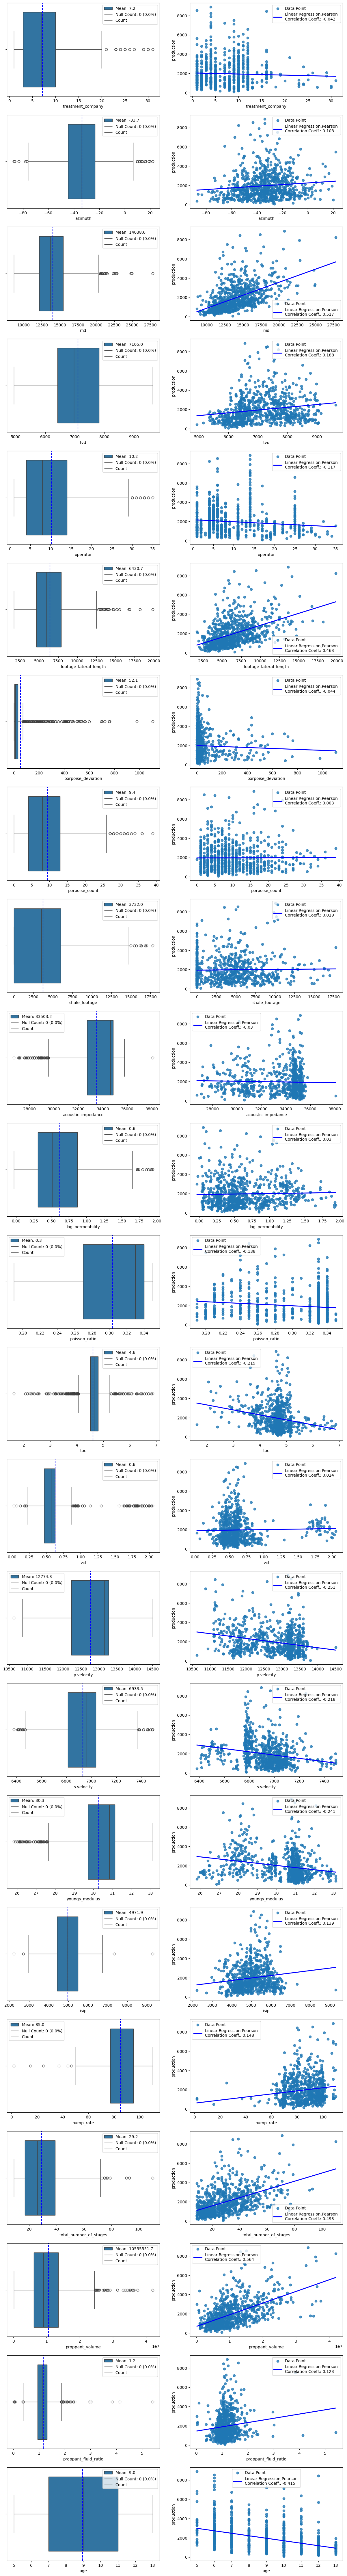

In [24]:
# Show boxplots for each feature
all_features = ['treatment_company', 'azimuth', 'md', 'tvd',
                'operator', 'footage_lateral_length', 'porpoise_deviation',
                'porpoise_count', 'shale_footage', 'acoustic_impedance',
                'log_permeability', 'poisson_ratio', 'toc', 'vcl', 'p-velocity',
                's-velocity', 'youngs_modulus', 'isip', 'pump_rate',
                'total_number_of_stages', 'proppant_volume', 'proppant_fluid_ratio','age']

fig, ax = plt.subplots(len(all_features), 2, figsize = (15,5*len(all_features)))
i=0
for feature in all_features:
    sns.boxplot(data=df3, x=feature, ax=ax[i,0])
    ax[i,0].axvline(x=df3[feature].mean(), color='b', label='mean', ls='--')
    ax[i,0].legend(labels=['Mean: ' + str(round(df3[feature].mean(), ndigits=1)), 
                           'Null Count: ' + str(df3[feature].isna().sum()) + ' (' + str(round(df3[feature].isna().sum() / len(df3[feature]) *100, ndigits=1))+ '%)', 
                           'Count'
                           ])
    
    sns.regplot(data=df3, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[i,1])
    ax[i,1].legend(labels=['Data Point', 
                           'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df3[feature].corr(df3['production']), ndigits=3)) 
                           ])
    i+=1